# One Hot Encoding

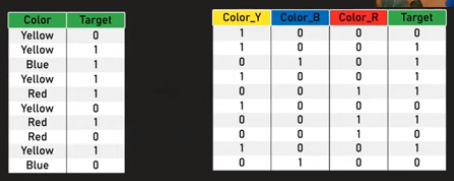
<p>In it, we convert nominal variables into vectors<p/>
<p>Eg. In the Following example :-<p/>
<p>Yellow = [1, 0, 0]<p/>
<p>Blue = [0, 1, 0]<p/>
<p>Red = [0, 0, 1]<p/>
<p>For 'n' categories we will have n cols, out of which, we will remove one col and use only n-1 cols due to multicollinearity<p/>
<p>These columns are also known has dummy variables<p/>
<p>Sometimes, if a particular category is appearing more frequently compared to other categories, then we use OHE using frequent variables, where only columns of the most frequent categories are considered<p/>

## Loading dataset

In [ ]:
import numpy as np
import pandas as pd

df = pd.read_csv('cars.csv')
df.head()

,brand,km_driven,fuel,owner,selling_price
0,Maruti,145500,Diesel,First Owner,450000
1,Skoda,120000,Diesel,Second Owner,370000
2,Honda,140000,Petrol,Third Owner,158000
3,Hyundai,127000,Diesel,First Owner,225000
4,Maruti,120000,Petrol,First Owner,130000


## Finding most used categories in brand, fuel and owner

In [ ]:
# Counts of each brand
df['brand'].value_counts()

,count
brand,
Maruti,2448
Hyundai,1415
Mahindra,772
Tata,734
Toyota,488
Honda,467
Ford,397
Chevrolet,230
Renault,228


In [ ]:
# Count of no. of brands
df['brand'].nunique()

32

In [ ]:
# Count of fuel types used in each fuel
df['fuel'].value_counts()

,count
fuel,
Diesel,4402
Petrol,3631
CNG,57
LPG,38


In [ ]:
# Count of categories of owner in each owner category
df['owner'].value_counts()

,count
owner,
First Owner,5289
Second Owner,2105
Third Owner,555
Fourth & Above Owner,174
Test Drive Car,5


## One Hot Encoding using Pandas

In [ ]:
df.shape

(8128, 5)

In [ ]:
df1 = pd.get_dummies(df, columns=['fuel', 'owner'])
df1.head()

,brand,km_driven,selling_price,fuel_CNG,fuel_Diesel,fuel_LPG,fuel_Petrol,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,Maruti,145500,450000,False,True,False,False,True,False,False,False,False
1,Skoda,120000,370000,False,True,False,False,False,False,True,False,False
2,Honda,140000,158000,False,False,False,True,False,False,False,False,True
3,Hyundai,127000,225000,False,True,False,False,True,False,False,False,False
4,Maruti,120000,130000,False,False,False,True,True,False,False,False,False


In [ ]:
# Orignal dataset has 5 columns
# On applying OHE on fuel, we get 4 columns
# On applying OHE on owner, we get 5 columns
# Total no. of cols = 3 + 4 + 5 = 12
df1.shape

(8128, 12)

In [ ]:
# Drop one column to solve multicollinearity problem
df1 = pd.get_dummies(df, columns=['fuel', 'owner'], drop_first=True)
df1.head()

,brand,km_driven,selling_price,fuel_Diesel,fuel_LPG,fuel_Petrol,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,Maruti,145500,450000,True,False,False,False,False,False,False
1,Skoda,120000,370000,True,False,False,False,True,False,False
2,Honda,140000,158000,False,False,True,False,False,False,True
3,Hyundai,127000,225000,True,False,False,False,False,False,False
4,Maruti,120000,130000,False,False,True,False,False,False,False


In [ ]:
# no. of cols reduces from 12 to 10
df1.shape

(8128, 10)

## One Hot Encoding using sklearn

In [ ]:
# Train test split
from sklearn.model_selection import train_test_split
X = df.iloc[:,0:4]
Y = df.iloc[:, -1]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [ ]:
# One hot encoding class, drop='first' indicates, we are dropping one col. from each attribute
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(drop='first', sparse_output=False, dtype=np.int32)
ohe.fit_transform(X_train[['fuel', 'owner']])

array([[0, 1, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 1],
       [1, 0, 0, ..., 1, 0, 0],
       ...,
       [0, 0, 1, ..., 1, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0]], dtype=int32)

In [ ]:
# Applying OHE on 'fuel' and 'owner' column from X_train and X_test
X_train_new = ohe.fit_transform(X_train[['fuel', 'owner']])
X_test_new = ohe.transform(X_test[['fuel', 'owner']])

In [ ]:
# Combining X_train_new with X
np.hstack((X_train[['brand', 'km_driven']].values, X_train_new))

array([['Hyundai', 60000, 0, ..., 0, 0, 0],
       ['Tata', 150000, 1, ..., 0, 0, 1],
       ['Hyundai', 110000, 1, ..., 1, 0, 0],
       ...,
       ['Hyundai', 90000, 0, ..., 1, 0, 0],
       ['Volkswagen', 90000, 1, ..., 0, 0, 0],
       ['Hyundai', 110000, 0, ..., 0, 0, 0]], dtype=object)

In [ ]:
# checking shape
np.hstack((X_train[['brand', 'km_driven']].values, X_train_new)).shape

(6502, 9)

## One Hot Encoding with top categories

In [ ]:
# Counts of each brand
counts = df['brand'].value_counts()

# Setting a threshold = 100
threshold = 100

# Getting those brands whose counts is less than 100
repl = counts[counts <= threshold].index
print(repl)

Index(['Nissan', 'Jaguar', 'Volvo', 'Datsun', 'Mercedes-Benz', 'Fiat', 'Audi',
       'Lexus', 'Jeep', 'Mitsubishi', 'Land', 'Force', 'Isuzu', 'Ambassador',
       'Kia', 'MG', 'Daewoo', 'Ashok', 'Opel', 'Peugeot'],
      dtype='object', name='brand')


In [ ]:
# Uncommon brands are clubbed into one column known as 'uncommon'
pd.get_dummies(df['brand'].replace(repl, 'uncommon')).sample(5)

,BMW,Chevrolet,Ford,Honda,Hyundai,Mahindra,Maruti,Renault,Skoda,Tata,Toyota,Volkswagen,uncommon
7464,False,False,False,False,False,False,False,True,False,False,False,False,False
3236,False,False,False,False,False,False,False,False,False,False,False,False,True
4490,False,False,False,False,False,False,False,False,False,True,False,False,False
7731,False,False,False,False,True,False,False,False,False,False,False,False,False
1667,False,False,False,False,False,False,False,False,False,True,False,False,False
